<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/Etv2_Neurog2_peaks_overlap_using_sample_for_the_overlap_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The goal of this notebook is to get a higher percent overlap in D7 vs D1 and also answer the reviewers question about rproducibility. We use Biological replicates.**

In [ ]:
start_time0 <- Sys.time()
options(max.print=1000)

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

## Install R packages

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  'devtools', 'BiocManager', 
  'circlize',
  'GenomicRanges', 'rtracklayer', 'ggrepel'

)

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'BiocVersion', 'circlize', 'GenomicRanges',
  'rtracklayer', 'ggrepel'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘matrixStats’, ‘futile.logger’, ‘snow’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘GenomeInfoDbData’, ‘bitops’, ‘BiocParallel’, ‘Rhtslib’, ‘SummarizedExperiment’, ‘rjson’, ‘GlobalOptions’, ‘shape’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘XVector’, ‘XML’, ‘Biostrings’, ‘zlibbioc’, ‘RCurl’, ‘Rsamtools’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’


Old packages: 'cli', 'gargle', 'googledrive', 'isoband', 'openssl', 'Rcpp',
  'testthat'



In [ ]:
BiocManager::install('cowplot')
library(cowplot)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'cowplot'

Old packages: 'cli', 'gargle', 'googledrive', 'isoband', 'openssl', 'Rcpp',
  'testthat'



In [ ]:
BiocManager::install('gridExtra')
library(gridExtra)


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'gridExtra'

Old packages: 'cli', 'gargle', 'googledrive', 'isoband', 'openssl', 'Rcpp',
  'testthat'


Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




## Load R packages

In [ ]:
library(GenomicRanges)
library(dplyr)
library(SummarizedExperiment)
library(ggplot2)
library(circlize) # colorRamp2
library(tidyr)
library(ggrepel)

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The follow

# Sample level summit files 

In [ ]:
bed <- c(
  'MEF_Dox_d1_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Etv2_summits.bed',
  'MEF_Dox_d2_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d2_Etv2_summits.bed',
  'MEF_Dox_d7_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d7_Etv2_summits.bed',
  'IP_Neurog2_0.5DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP_NEUROG2_N_0.5DPT_peaks.narrowPeak',
  'IP_Neurog2_1DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP_NEUROG2_N_1DPT_peaks.narrowPeak',
  'IP_Neurog2_2DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP_NEUROG2_N_2DPT_peaks.narrowPeak'
)

In [ ]:
gr_summit <- lapply(1:length(bed), function(i){
  x <- read.table(bed[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), peak_id = x[, 4], score = x[, 5])
  gr$source <- names(bed)[i]
  gr
})

In [ ]:
names(gr_summit) <- names(bed)

# Etv2 Replicate level narrowpeak files


In [ ]:
bed_files <- c('MEF_Dox_d1_Etv2_S5' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript_version=20200714b/DoxD1Etv2lib-1_S5.dedup_peaks.narrowPeak',
	            'MEF_Dox_d1_Etv2_S6' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript_version=20200714b/DoxD1Etv2lib-2_S6.dedup_peaks.narrowPeak',
              'MEF_Dox_d2_Etv2_S7' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript_version=20200714b/DoxD2Etv2lib-1_S7.dedup_peaks.narrowPeak',
              'MEF_Dox_d2_Etv2_S8' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript_version=20200714b/DoxD2Etv2lib-2_S8.dedup_peaks.narrowPeak',
              'MEF_Dox_d7_Etv2_S7' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript_version=20200714b/DoxD7Etv2lib-1_S7.dedup_peaks.narrowPeak',
              'MEF_Dox_d7_Etv2_S8' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript_version=20200714b/DoxD7Etv2lib-2_S8.dedup_peaks.narrowPeak',
              'IP1_Neurog2_0.5DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP1_NEUROG2_N_0.5DPT_peaks.narrowPeak',
              'IP2_Neurog2_0.5DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP2_NEUROG2_N_0.5DPT_peaks.narrowPeak',
              'IP1_Neurog2_1DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP1_NEUROG2_N_1DPT_peaks.narrowPeak',
              'IP2_Neurog2_1DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP2_NEUROG2_N_1DPT_peaks.narrowPeak',
              'IP1_Neurog2_2DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP1_NEUROG2_N_2DPT_peaks.narrowPeak',
              'IP2_Neurog2_2DPT' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=smith_version=20210608a/IP2_NEUROG2_N_2DPT_peaks.narrowPeak'
)

In [ ]:
for (i in 1:length(bed_files)){
  sprintf('wget -x -c -nH %s', bed_files[i]) %>% system()
}
bed_files <- gsub('https://s3.msi.umn.edu/', './', bed_files)
message(sprintf('all bed_files exist: %s', all(file.exists(bed_files))))

all bed_files exist: TRUE



# Read and name the columns of the narrow peaks file obtained from MACS2 called using p of 0.001

In [ ]:
tab <- lapply(1:length(bed_files), function(i){
  x <- read.table(bed_files[i], header = FALSE, sep = '\t')})
  names(tab) <- names(bed_files)

In [ ]:
for (i in 1:length(tab)){
  colnames(tab[[i]]) <- c('chr', 'start', 'end', 'name', 'score', 'strand', 'signalValue', 'neglog10_pval', 'neglog10_qval', 'peak')
}

In [ ]:
lapply(tab, function(t){range(t$score)})

$MEF_Dox_d1_Etv2_S5
[1]   30 5821

$MEF_Dox_d1_Etv2_S6
[1]   30 5875

$MEF_Dox_d2_Etv2_S7
[1]   30 7458

$MEF_Dox_d2_Etv2_S8
[1]   30 9027

$MEF_Dox_d7_Etv2_S7
[1]   30 6757

$MEF_Dox_d7_Etv2_S8
[1]   30 1015

$IP1_Neurog2_0.5DPT
[1]   20 1240

$IP2_Neurog2_0.5DPT
[1]   20 1129

$IP1_Neurog2_1DPT
[1]   20 2208

$IP2_Neurog2_1DPT
[1]   20 2094

$IP1_Neurog2_2DPT
[1]   20 1459

$IP2_Neurog2_2DPT
[1]   20 1820

In [ ]:
lapply(tab, function(t){range(t$signalValue)})

$MEF_Dox_d1_Etv2_S5
[1]   1.43757 120.01800

$MEF_Dox_d1_Etv2_S6
[1]   2.0133 128.2860

$MEF_Dox_d2_Etv2_S7
[1]   1.90575 221.41600

$MEF_Dox_d2_Etv2_S8
[1]   1.78392 256.88000

$MEF_Dox_d7_Etv2_S7
[1]   2.2879 180.1280

$MEF_Dox_d7_Etv2_S8
[1]  2.40115 31.27190

$IP1_Neurog2_0.5DPT
[1]  1.20032 22.75170

$IP2_Neurog2_0.5DPT
[1]  1.17967 21.60200

$IP1_Neurog2_1DPT
[1]  1.14616 31.86680

$IP2_Neurog2_1DPT
[1]  1.15404 31.62480

$IP1_Neurog2_2DPT
[1]  1.1424 23.5078

$IP2_Neurog2_2DPT
[1]  1.14221 27.67190

# Normalizing the Enrichment and Score column of the replicate level data using min-max normalization

In [ ]:
for(i in 1:length(tab)){
  tab[[i]]$norm_fe <- tab[[i]]$signalValue/sum(tab[[i]]$signalValue)
  tab[[i]]$norm_score <- tab[[i]]$score/sum(tab[[i]]$score)
}

In [ ]:
for(i in 1:length(tab)){
  tab[[i]]$norm_fe <- (tab[[i]]$signalValue - min(tab[[i]]$signalValue))/(max(tab[[i]]$signalValue) - min(tab[[i]]$signalValue))
  tab[[i]]$norm_score <- (tab[[i]]$score - min(tab[[i]]$score))/(max(tab[[i]]$score) - min(tab[[i]]$score))
}

# Generating granges object from the narrowpeak files

In [ ]:
gr_list <- lapply(tab, function(t){
  gr <- GRanges(seqnames = t$chr, range = IRanges(t$start, t$end), peak_id = t$name, 
  fe = t$signalValue, pval = t$neglog10_pval, score = t$score, 
  qval = t$neglog10_qval, norm_fe = t$norm_fe, norm_score = t$norm_score)
  gr
  })

# Subsetting and calculating the Granges to include ranges with normalized Score > 0.1 & normalized Enrichment > 0.01

In [ ]:
subset_gr <- lapply(gr_list, function(g){
  g[(elementMetadata(g)[, "norm_score"] > 0.1) &(elementMetadata(g)[, "norm_fe"] > 0.01),]
})

In [ ]:
lapply(subset_gr, function(s){length(reduce(resize(s, width = 200, fix = 'center')))})

$MEF_Dox_d1_Etv2_S5
[1] 3061

$MEF_Dox_d1_Etv2_S6
[1] 1273

$MEF_Dox_d2_Etv2_S7
[1] 1224

$MEF_Dox_d2_Etv2_S8
[1] 1261

$MEF_Dox_d7_Etv2_S7
[1] 1126

$MEF_Dox_d7_Etv2_S8
[1] 2422

$IP1_Neurog2_0.5DPT
[1] 3988

$IP2_Neurog2_0.5DPT
[1] 4844

$IP1_Neurog2_1DPT
[1] 7260

$IP2_Neurog2_1DPT
[1] 6629

$IP1_Neurog2_2DPT
[1] 7775

$IP2_Neurog2_2DPT
[1] 8235

In [ ]:
subset_gr_length <- lapply(gr_list, function(g){
  length(g[(elementMetadata(g)[, "norm_score"] > 0.1) &(elementMetadata(g)[, "norm_fe"] > 0.01),])
})

In [ ]:
subset_gr_length

$MEF_Dox_d1_Etv2_S5
[1] 3061

$MEF_Dox_d1_Etv2_S6
[1] 1273

$MEF_Dox_d2_Etv2_S7
[1] 1224

$MEF_Dox_d2_Etv2_S8
[1] 1261

$MEF_Dox_d7_Etv2_S7
[1] 1126

$MEF_Dox_d7_Etv2_S8
[1] 2422

$IP1_Neurog2_0.5DPT
[1] 3988

$IP2_Neurog2_0.5DPT
[1] 4844

$IP1_Neurog2_1DPT
[1] 7260

$IP2_Neurog2_1DPT
[1] 6629

$IP1_Neurog2_2DPT
[1] 7775

$IP2_Neurog2_2DPT
[1] 8235

# Using the formula 
overlap_peaks(sample bed & replicate1) + overlap_peaks(sample bed & replicate2)/ peaks(replicate1) + peaks(replicate2)

and width 200


# Etv2

## D1

In [ ]:
d1 <- lapply(subset_gr[c('MEF_Dox_d1_Etv2_S5','MEF_Dox_d1_Etv2_S6')], function(d1){
  length(subsetByOverlaps(reduce(resize(d1, fix = 'center', width = 200)), reduce(resize(gr_summit$MEF_Dox_d1_Etv2, fix = 'center', width = 200))))
})

In [ ]:
d1

$MEF_Dox_d1_Etv2_S5
[1] 2671

$MEF_Dox_d1_Etv2_S6
[1] 1103

## D7

In [ ]:
d7 <- lapply(subset_gr[c('MEF_Dox_d7_Etv2_S7','MEF_Dox_d7_Etv2_S8')], function(d7){
  length(subsetByOverlaps(reduce(resize(d7, fix = 'center', width = 200)), reduce(resize(gr_summit$MEF_Dox_d7_Etv2, fix = 'center', width = 200))))
})

In [ ]:
d7

$MEF_Dox_d7_Etv2_S7
[1] 890

$MEF_Dox_d7_Etv2_S8
[1] 2419

# Dataset of the percent overlap for D1 and D7 

In [ ]:
overlap_dat <- data.frame(percent_overlap = c((d1$MEF_Dox_d1_Etv2_S5+d1$MEF_Dox_d1_Etv2_S6)*100/(subset_gr_length$MEF_Dox_d1_Etv2_S5+subset_gr_length$MEF_Dox_d1_Etv2_S6),
(d7$MEF_Dox_d7_Etv2_S7+d7$MEF_Dox_d7_Etv2_S8)*100/(subset_gr_length$MEF_Dox_d7_Etv2_S7+subset_gr_length$MEF_Dox_d7_Etv2_S8)), time = c('d1','d7'))

We get a higher percent for D7 (87.08%) vs D1 (93.26%) subsetting data based on normalized Score and normalized Enrichment fro all 4 replicates and using a width of 200 to overlap with the sample level data.

# Neurog2

# 0.5 DPT

In [ ]:
names(subset_gr)

[1] "MEF_Dox_d1_Etv2_S5" "MEF_Dox_d1_Etv2_S6" "MEF_Dox_d2_Etv2_S7"
 [4] "MEF_Dox_d2_Etv2_S8" "MEF_Dox_d7_Etv2_S7" "MEF_Dox_d7_Etv2_S8"
 [7] "IP1_Neurog2_0.5DPT" "IP2_Neurog2_0.5DPT" "IP1_Neurog2_1DPT"  
[10] "IP2_Neurog2_1DPT"   "IP1_Neurog2_2DPT"   "IP2_Neurog2_2DPT"

In [ ]:
dpt_0.5 <- lapply(subset_gr[c('IP1_Neurog2_0.5DPT','IP2_Neurog2_0.5DPT')], function(d1){
  length(subsetByOverlaps(reduce(resize(d1, fix = 'center', width = 200)), reduce(resize(gr_summit$IP_Neurog2_0.5DPT, fix = 'center', width = 200))))
})

In [ ]:
dpt_0.5

$IP1_Neurog2_0.5DPT
[1] 3867

$IP2_Neurog2_0.5DPT
[1] 4589

# 2 DPT

In [ ]:
dpt_2 <- lapply(subset_gr[c('IP1_Neurog2_2DPT','IP2_Neurog2_2DPT')], function(d1){
  length(subsetByOverlaps(reduce(resize(d1, fix = 'center', width = 200)), reduce(resize(gr_summit$IP_Neurog2_2DPT, fix = 'center', width = 200))))
})

In [ ]:
dpt_2

$IP1_Neurog2_2DPT
[1] 7721

$IP2_Neurog2_2DPT
[1] 8185

# Dataset of the percent overlap for 0.5DPT and 2DPT

In [ ]:
neurog2_overlap_dat <- data.frame(percent_overlap = c((dpt_0.5$IP1_Neurog2_0.5DPT+dpt_0.5$IP2_Neurog2_0.5DPT)*100/(subset_gr_length$IP1_Neurog2_0.5DPT+subset_gr_length$IP2_Neurog2_0.5DPT),
(dpt_2$IP1_Neurog2_2DPT+dpt_2$IP2_Neurog2_2DPT)*100/(subset_gr_length$IP1_Neurog2_2DPT+subset_gr_length$IP2_Neurog2_2DPT)), time = c('dpt_0.5','dpt_2'))

We get a higher percent for 0.5DPT (95.74%) vs D1 (99.35%) subsetting data based on normalized Score and normalized Enrichment for all 4 replicates and using a width of 200 to overlap with the sample level data.

# Barplot displaying percent calculated using the above formula for Etv2 & Neurog2

In [ ]:
etv2 <- ggplot(overlap_dat, aes(x=time, y=percent_overlap, fill = time, label = round(percent_overlap,2)))+
geom_bar(stat = 'identity') + 
scale_fill_manual(values = c('lightblue','blue')) +
geom_text_repel(nudge_y = 0.25, size = 8) +
theme_bw() + 
  theme(panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

In [ ]:
neurog2 <- ggplot(neurog2_overlap_dat, aes(x=time, y=percent_overlap, fill = time, label = round(percent_overlap,2)))+
geom_bar(stat = 'identity') + 
scale_fill_manual(values = c('lightblue','blue')) +
geom_text_repel(nudge_y = 0.25, size = 8) +
theme_bw() + 
  theme(panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"))

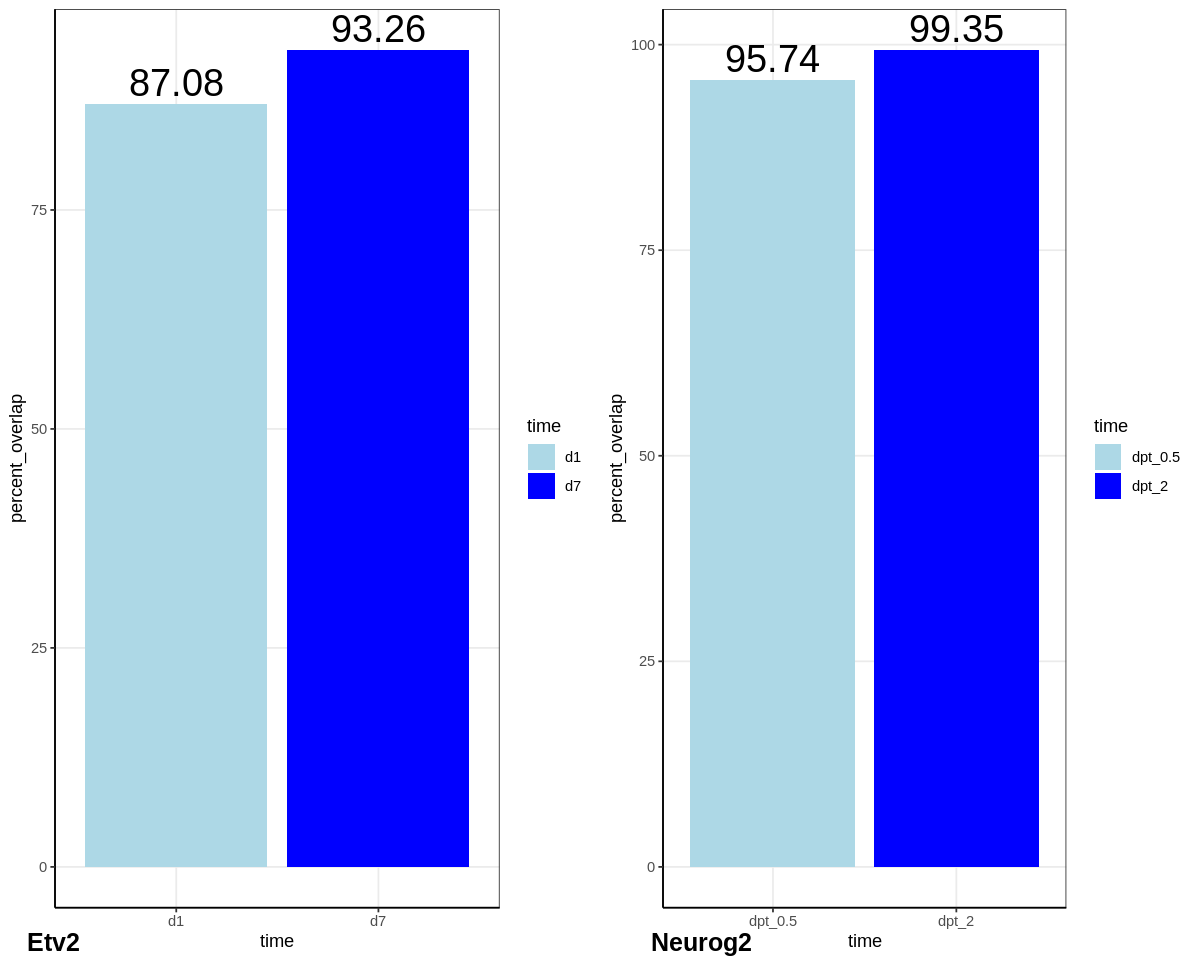

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot_grid(etv2, neurog2, labels = c('Etv2', 'Neurog2'), label_size = 15, label_x = 0, label_y = 0,
  hjust = -0.5, vjust = -0.5)

We do see a increase in the percent of overlap in D7 Etv2 and 2DPT Neurog2 data. 

In [ ]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] cowplot_1.1.1               gridExtra_2.3              
 [3] ggrepel_0.9.1               tidyr_1.1.3                
 [5] circlize_0.4.13             ggplot2_3.3.5              
 [7] SummarizedExperiment_1.22.0 Biobase_2.52.0             
 [